**Machine Learning Regression (Time Series)**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
customer = pd.read_csv('datas/customer.csv', delimiter=';')
customer.dropna()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
441,442,42,1,Married,"14,88"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [9]:
product = pd.read_csv('datas/product.csv', delimiter=';')
product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [10]:
store = pd.read_csv('datas/store.csv', delimiter=';')
store.dropna()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [11]:
transaction = pd.read_csv('datas/transaction.csv', delimiter=';')
transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [12]:
merged_data = customer.merge(transaction, on='CustomerID')
merged_data = merged_data.merge(product, on='ProductID')
merged_data = merged_data.merge(store, on='StoreID')
merged_data.to_csv('merged_data.csv', index=False)

In [13]:
dataset = pd.read_csv("merged_data.csv", delimiter=",")
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')
dataset.set_index('Date', inplace=True)
dataset

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,,
2022-02-23,1,55,1,Married,"5,12",TR54475,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2022-05-22,5,58,1,Married,"3,57",TR53643,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2022-03-10,7,31,0,Married,"4,57",TR5151,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2022-06-18,19,24,1,Single,"4,14",TR98635,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2022-01-12,28,55,0,Married,"6,08",TR9420,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07,403,30,0,Married,"4,06",TR21751,P9,10000,5,50000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"
2022-04-05,410,55,1,Married,"8,68",TR86692,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"
2022-10-23,411,19,1,Single,0,TR67993,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"


In [14]:
dataset = dataset.groupby('Date').agg({'Qty': 'sum'})
dataset

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


Hapus data

In [15]:
train_size = int(len(dataset) * 0.8)
train_data, test_data = dataset[:train_size], dataset[train_size:]

In [16]:
train_data

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-10-15,33
2022-10-16,26
2022-10-17,53


In [17]:
test_data

,Qty
Date,
2022-10-20,39
2022-10-21,35
2022-10-22,56
2022-10-23,59
2022-10-24,39
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [18]:
model = ARIMA(train_data.iloc[:,0], order=(0,1,0))
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, dynamic=False)

In [20]:
predictions = model_fit.forecast(steps=len(test_data))

Mean Squared Error: 347.67123287671234


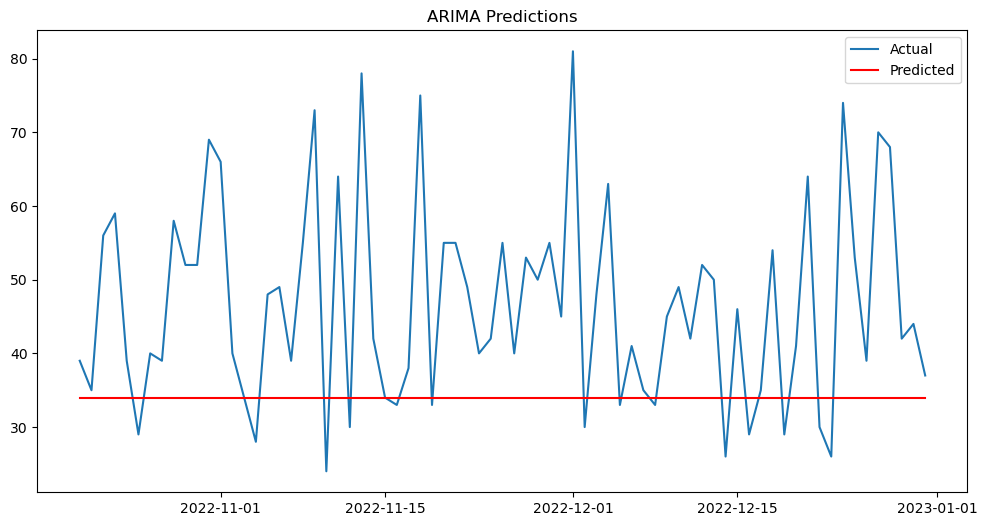

In [21]:
predictions_series = pd.Series(predictions, index=test_data.index)

mse = mean_squared_error(test_data, predictions_series)
print(f"Mean Squared Error: {mse}")

# Visualization of results
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(predictions_series, color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Predictions')
plt.show()


**Machine Learning Clustering**

In [22]:
data = pd.read_csv("merged_data.csv", delimiter=",")
data

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,403,30,0,Married,"4,06",TR21751,07/10/2022,P9,10000,5,50000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"
5016,410,55,1,Married,"8,68",TR86692,05/04/2022,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"
5017,411,19,1,Single,0,TR67993,23/10/2022,P9,10000,2,20000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"
5018,427,54,0,Married,"16,88",TR28578,30/10/2022,P9,10000,3,30000,7,Yoghurt,10000,Buana Indah,Buana,General Trade,"3,316694","114,590111"


In [23]:
data = data.groupby('CustomerID').agg({'TransactionID':'count', 'Qty': 'sum', 'TotalAmount':'sum'})
data

,TransactionID,Qty,TotalAmount
CustomerID,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
443,16,59,485100
444,18,62,577700
445,18,68,587200


In [24]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)

KMeans(n_clusters=7)

In [25]:
labels = kmeans.predict(data)

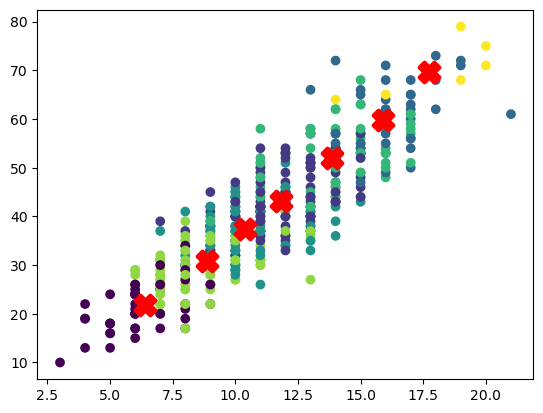

In [26]:
centroids = kmeans.cluster_centers_

plt.scatter(data['TransactionID'], data['Qty'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.show()
